In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
df=pd.read_csv("heart_disease_data.csv")
df.head()
#reading the data set in categorical and continous form

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#colclusion there are no missing values in given  dataset
df.isnull().sum()
#filling the null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#seperate category and continuous variables
category,continuous=[],[]
for i in df.columns:
    if(len(np.unique(df[i]))<10):
        category.append(i)
    else:
        continuous.append(i)
print(f"category=",category)
print(f"continuous=",continuous)

category= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [11]:
print(category)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [12]:
print(continuous)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [13]:
newcatdf=df[category]
newcondf=df[continuous]

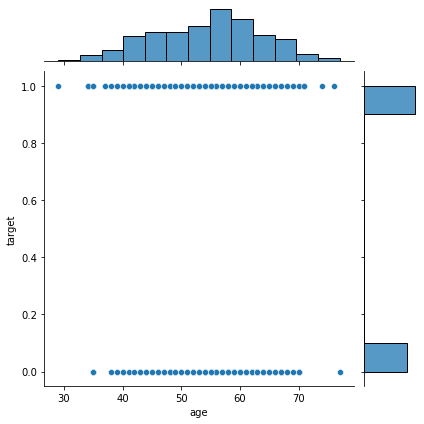

In [14]:
sns.jointplot(y='target',x='age',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

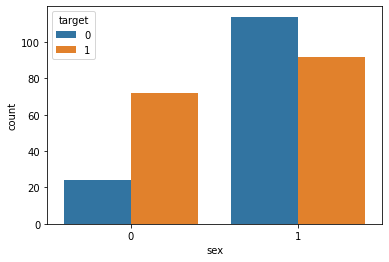

In [15]:
sns.countplot(x='sex',hue='target',data=df)

<AxesSubplot:xlabel='target', ylabel='age'>

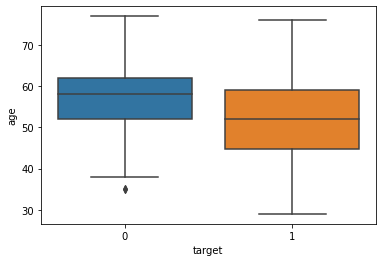

In [16]:
sns.boxplot(x='target',y='age',data=df)

<AxesSubplot:xlabel='cp', ylabel='count'>

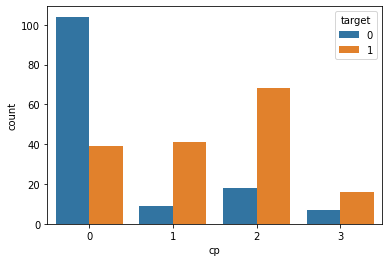

In [17]:
sns.countplot(x='cp',hue='target',data=df)

In [18]:
features=enumerate(category)

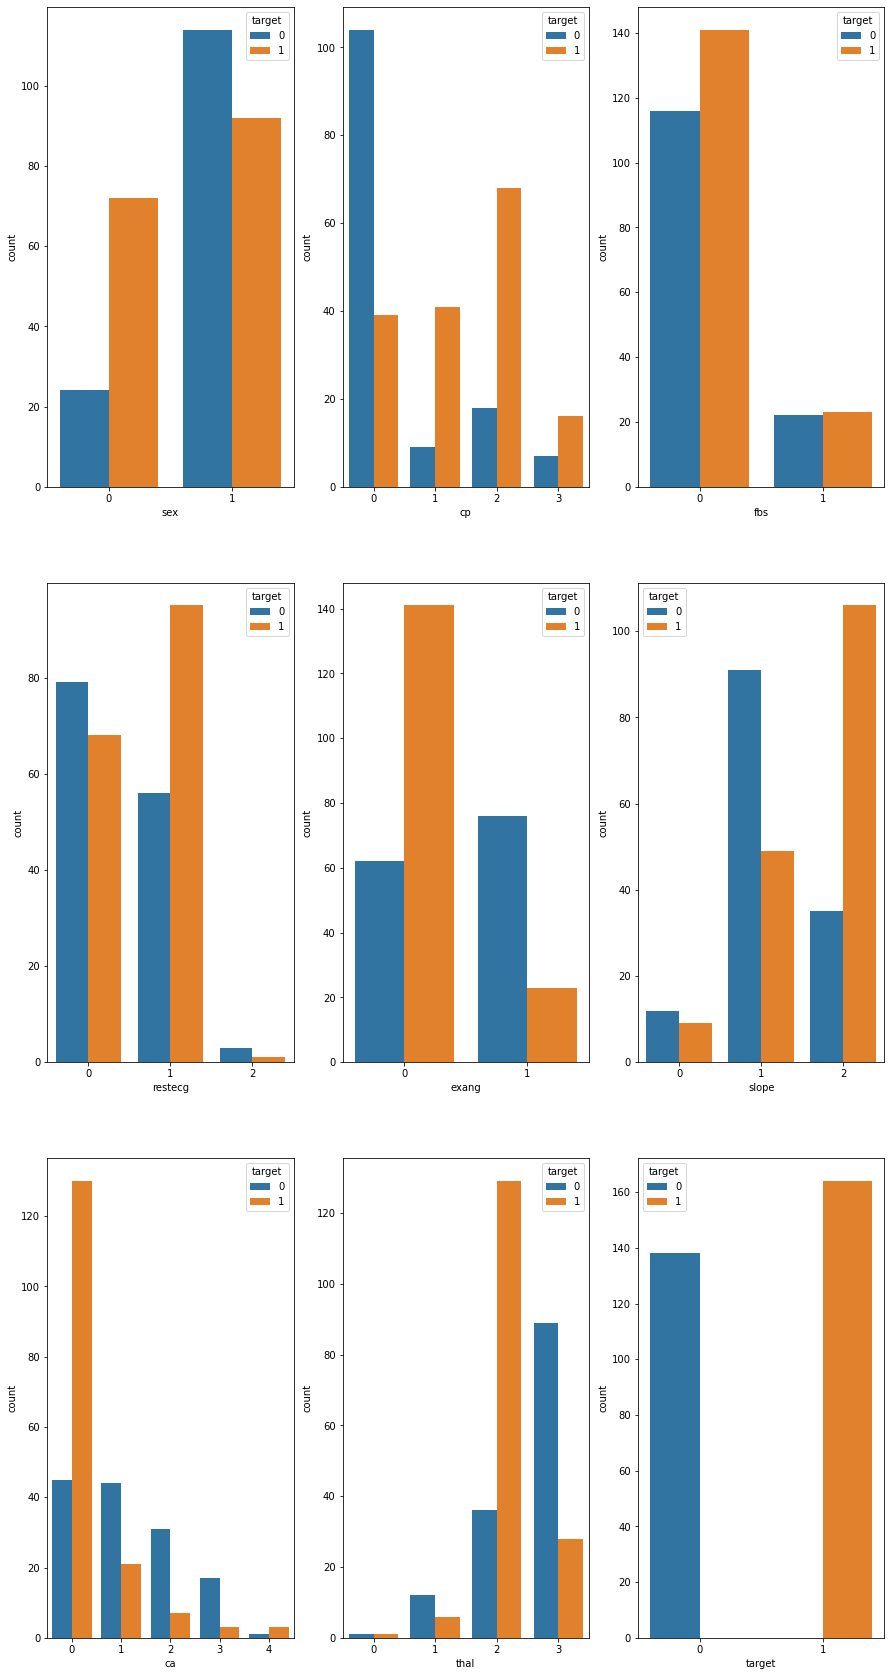

In [19]:
plt.figure(figsize=(15,30))
for i in enumerate(category):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x=i[1],hue='target',data=df)
    plt.xlabel(i[1])
    # we will get the detalis of all categories 

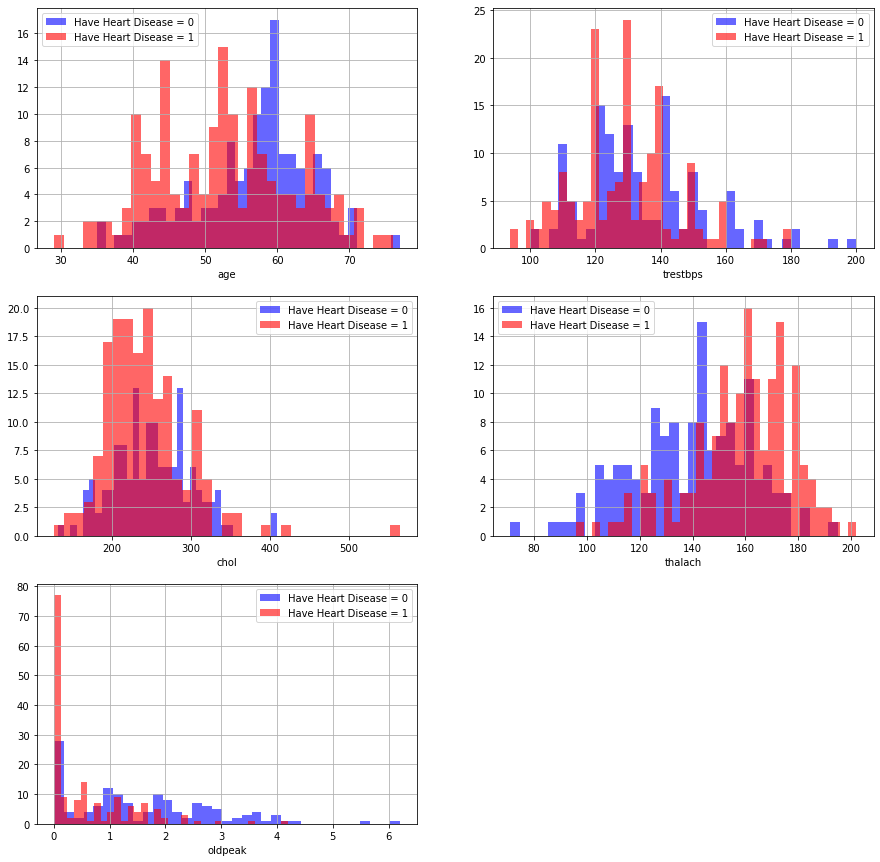

In [20]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = 0', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = 1', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    # we use the label encoding to find the values

In [21]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = continuous
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

In [22]:
continuous_data=df[continuous]
continuous_data.head(5)
continuous_data['target']=df['target']
continuous_data.corr(method='pearson')

<ipython-input-22-55737f56ba30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_data['target']=df['target']


,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.221476
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600,-0.146269
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.081437
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,-0.429146
target,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,1.000000


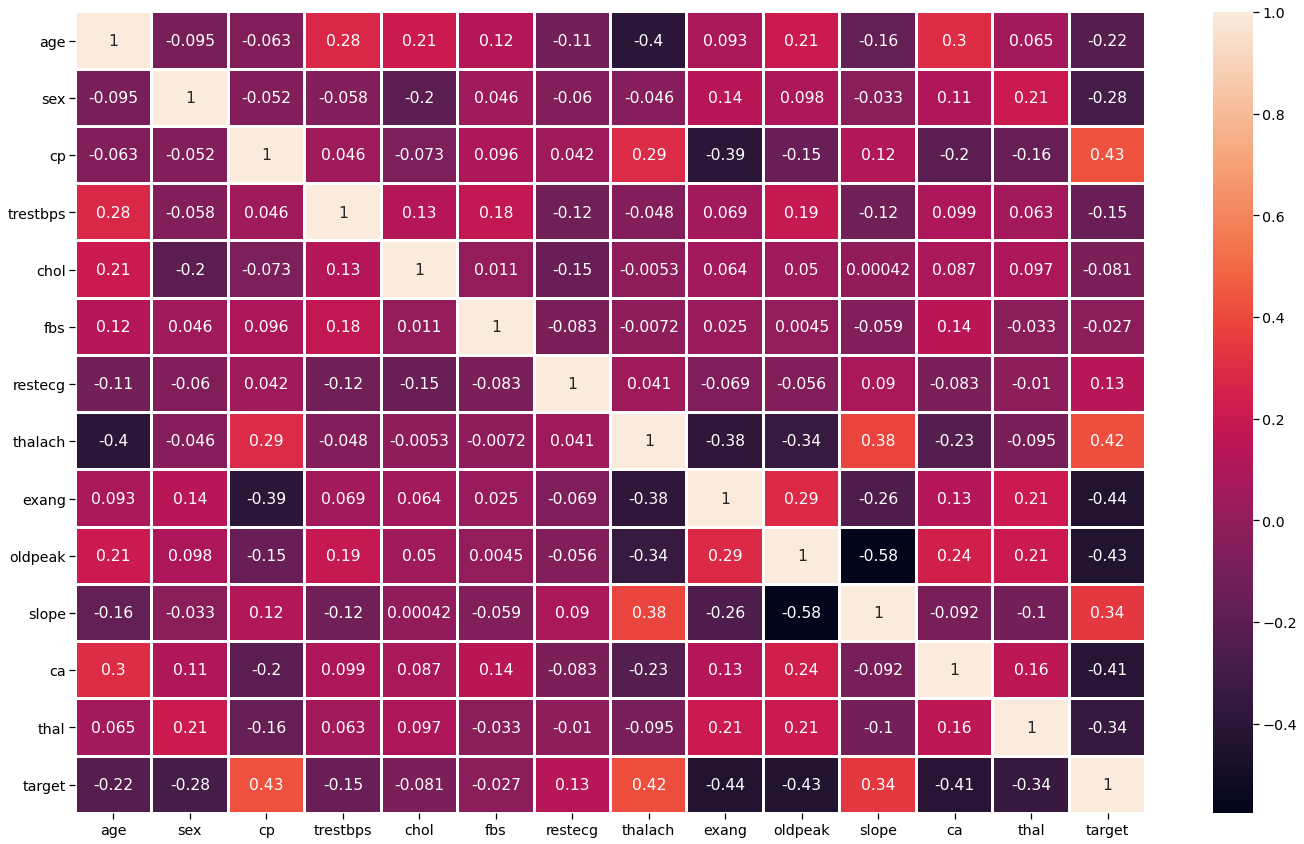

In [23]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()
#we are using the cross validation to give the best accuracy 
# all the values are evenly spaced and its easy to find the values

In [24]:
# we are using the x-train and y-train since we are using the float values:
#x-train and y-train cant conver string vlues to float values
def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred, output_dict=True))
        print("Train Result:\n**********************************************************")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytrain, pred)}\n")
        
    elif train==False:
        pred = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred, output_dict=True))
        print("Test Result:\n*********************************************************")        
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")

In [25]:
x=df.drop(['target'],axis=1)
y=df['target']

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [29]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [30]:
pred=model.predict(xtest)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(pred,ytest)

0.8524590163934426

In [33]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(xtrain, ytrain)

print_score(log_reg, xtrain, ytrain, xtest, ytest, True)
print_score(log_reg, xtrain, ytrain, xtest, ytest ,False)
#precision=tp/tp+fp
#recall=tp/tp+fn
#accuracy=tp+fn/total

Train Result:
**********************************************************
Accuracy Score: 85.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870968    0.837838  0.850622    0.854403      0.852272
recall       0.771429    0.911765  0.850622    0.841597      0.850622
f1-score     0.818182    0.873239  0.850622    0.845711      0.849252
support    105.000000  136.000000  0.850622  241.000000    241.000000
_______________________________________________
Confusion Matrix: 
 [[ 81  24]
 [ 12 124]]

Test Result:
*********************************************************
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.777778  0.868852   0.888889      0.897996
recall      0.757576   1.000000  0.868852   0.878788      0.868852
f1-score    0.862069   0.

In [34]:
test_score = accuracy_score(ytest, log_reg.predict(xtest)) * 100
train_score = accuracy_score(ytrain, log_reg.predict(xtrain)) * 100

results = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,86.885246


In [35]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
print_score(knn, xtrain, ytrain, xtest, ytest, True)
print_score(knn, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 85.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.848485    0.852113  0.850622    0.850299      0.850532
recall       0.800000    0.889706  0.850622    0.844853      0.850622
f1-score     0.823529    0.870504  0.850622    0.847017      0.850038
support    105.000000  136.000000  0.850622  241.000000    241.000000
_______________________________________________
Confusion Matrix: 
 [[ 84  21]
 [ 15 121]]

Test Result:
*********************************************************
Accuracy Score: 80.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.956522   0.710526  0.803279   0.833524      0.843606
recall      0.666667   0.964286  0.803279   0.815476      0.803279
f1-score    0.785714   0.

In [36]:
test_score = accuracy_score(ytest, knn.predict(xtest)) * 100
train_score = accuracy_score(ytrain, knn.predict(xtrain)) * 100

results2 = pd.DataFrame(data=[["knn", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results2,ignore_index=True)
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,86.885246
1,knn,85.062241,80.327869


In [37]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(xtrain, ytrain)

SVC(gamma=0.1)

In [38]:

print_score(svm, xtrain, ytrain, xtest, ytest, True)
print_score(svm, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 88.80%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.923913    0.865772  0.887967    0.894842      0.891103
recall       0.809524    0.948529  0.887967    0.879027      0.887967
f1-score     0.862944    0.905263  0.887967    0.884104      0.886825
support    105.000000  136.000000  0.887967  241.000000    241.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  20]
 [  7 129]]

Test Result:
*********************************************************
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.960000   0.750000  0.836066   0.855000      0.863607
recall      0.727273   0.964286  0.836066   0.845779      0.836066
f1-score    0.827586   0.

In [39]:
test_score = accuracy_score(ytest, svm.predict(xtest)) * 100
train_score = accuracy_score(ytrain, svm.predict(xtrain)) * 100

results3 = pd.DataFrame(data=[["svm", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results3,ignore_index=True)
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,86.885246
1,knn,85.062241,80.327869
2,svm,88.796680,83.606557


In [40]:
dt = DecisionTreeClassifier(random_state=40)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=40)

In [41]:
print_score(dt, xtrain, ytrain, xtest, ytest, True)
print_score(dt, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    105.0  136.0       1.0      241.0         241.0
_______________________________________________
Confusion Matrix: 
 [[105   0]
 [  0 136]]

Test Result:
*********************************************************
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.900000   0.806452  0.852459   0.853226      0.857060
recall      0.818182   0.892857  0.852459   0.855519      0.852459
f1-score    0.857143   0.847458  0.852459   0.852300      0.852697
support    3

In [42]:
test_score = accuracy_score(ytest, dt.predict(xtest)) * 100
train_score = accuracy_score(ytrain, dt.predict(xtrain)) * 100

results3 = pd.DataFrame(data=[["decisiontree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results3,ignore_index=True)
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,86.885246
1,knn,85.062241,80.327869
2,svm,88.796680,83.606557
3,decisiontree,100.000000,85.245902


In [43]:
rf = RandomForestClassifier(n_estimators=1000, random_state=40)
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, random_state=40)

In [44]:
print_score(rf, xtrain, ytrain, xtest, ytest, True)
print_score(rf, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    105.0  136.0       1.0      241.0         241.0
_______________________________________________
Confusion Matrix: 
 [[105   0]
 [  0 136]]

Test Result:
*********************************************************
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.961538   0.771429  0.852459   0.866484      0.874275
recall      0.757576   0.964286  0.852459   0.860931      0.852459
f1-score    0.847458   0.857143  0.852459   0.852300      0.851903
support    3

In [45]:
test_score = accuracy_score(ytest, rf.predict(xtest)) * 100
train_score = accuracy_score(ytrain, rf.predict(xtrain)) * 100

results3 = pd.DataFrame(data=[["random", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results3,ignore_index=True)
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,86.885246
1,knn,85.062241,80.327869
2,svm,88.796680,83.606557
3,decisiontree,100.000000,85.245902
4,random,100.000000,85.245902


In [46]:
params = {"C": np.logspace(-3, 4, 18),
          "solver": ["liblinear"]}

logreg2 = LogisticRegression()

lr_cv = GridSearchCV(logreg2, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(xtrain, ytrain)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(xtrain, ytrain)

print_score(lr_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(lr_clf, xtrain, ytrain, xtest, ytest, train=False)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'C': 1.9684194472866112, 'solver': 'liblinear'}
Train Result:
**********************************************************
Accuracy Score: 84.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.869565    0.832215  0.846473    0.850890      0.848488
recall       0.761905    0.911765  0.846473    0.836835      0.846473
f1-score     0.812183    0.870175  0.846473    0.841179      0.844909
support    105.000000  136.000000  0.846473  241.000000    241.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  25]
 [ 12 124]]

Test Result:
*********************************************************
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.961538   0.771429 

In [47]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtrain, ytrain)
    train_score.append(accuracy_score(ytrain, model.predict(xtrain)))

Maximum KNN score on the test data: 100.00%


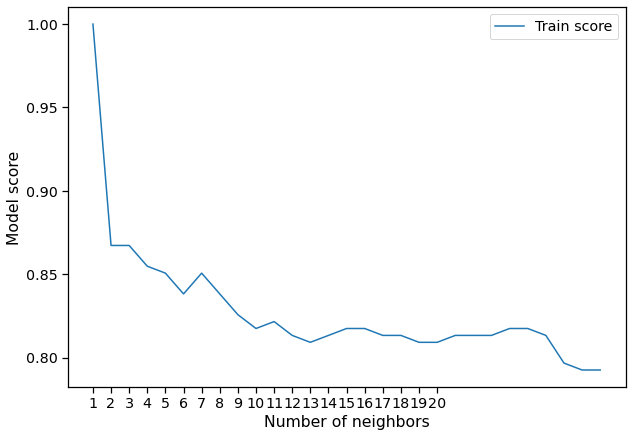

In [48]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(xtrain, ytrain)

print_score(knn_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(knn_clf, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
**********************************************************
Accuracy Score: 79.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.850000    0.770186   0.79668    0.810093       0.80496
recall       0.647619    0.911765   0.79668    0.779692       0.79668
f1-score     0.735135    0.835017   0.79668    0.785076       0.79150
support    105.000000  136.000000   0.79668  241.000000     241.00000
_______________________________________________
Confusion Matrix: 
 [[ 68  37]
 [ 12 124]]

Test Result:
*********************************************************
Accuracy Score: 80.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.956522   0.710526  0.803279   0.833524      0.843606
recall      0.666667   0.964286  0.803279   0.815476      0.803279
f1-score    0.785714   0.